# *Text Classification*

### Date: August 28, 2023
### Author: David Santiago Barreto Mora
### Topic: Classification of e-commerce products.
---

The objective of this session is to classify e-commerce products in 4 categories, based on the available descriptions on e-commerce platforms.

The 4  categories are:
- Electronics
- Household
- Books
- Clothing & Accesories.

## Procedure to follow
1. **Exploratory data analysis:** We compare the distributions of:
    - Number of characters.
    - Number of words.
    - Average length of words present in the description of products, in all 4 categories. 
  
  <br></br>
2. **Data normalization:** Encompasses techniques and description of products.

3. **TF-IDF:** Vectorizaer 

In [1]:
# First, we import the necessary libraries.

import numpy as np
import pandas as pd

import time # Used to measure the performance of models

# Graphing
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

# Machine learning
from sklearn.model_selection import train_test_split

# NLP Libraries
import string, re, nltk
from string import punctuation


In [4]:
# Second, we import the .csv with the data
columnNames = ["Label", "Description"]

url0 = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Texto/Text_Ecommerce/ecommerce0.csv"
url1 = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Texto/Text_Ecommerce/ecommerce1.csv"
df0 = pd.read_csv(url0, header=None, names=columnNames)
df1 = pd.read_csv(url1, header=None, names=columnNames)

df2 = pd.concat([df0, df1])

df2.head()

,Label,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [6]:
# Number of null data

missing = len(df2) - len(df2.dropna())



print("Number of records with null data (NaN)", missing)
print("Number of records with duplicted data", df2.duplicated().sum())

Number of records with null data (NaN) 1
Number of records with duplicted data 22622


In [7]:
# Now, we eliminate null and duplicate data
df2.dropna(inplace = True)
df2.drop_duplicates(inplace = True)

# Because we eliminated duplicates, we now reset the indexes
df2["Label"].unique()



array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

As we can see, the column 'label' contains categorial data. We will assign each label to a number, with the purpose of converting the data in the column to numerical data.
- Electronics = 0
- Household  = 1
- Books = 2
- Clothing & accesories = 3

In [12]:
# Conversion of labels to numbers
label_dict = {
    "Electronics" : 0,
    "Household" : 1,
    "Books" : 2,
    "Clothing & Accessories" : 3
}

df2['Label'] = df2['Label'].replace(label_dict)
print(df2.head())

   Label                                        Description
0      1  Paper Plane Design Framed Wall Hanging Motivat...
1      1  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2      1  SAF 'UV Textured Modern Art Print Framed' Pain...
3      1  SAF Flower Print Framed Painting (Synthetic, 1...
4      1  Incredible Gifts India Wooden Happy Birthday U...


In [14]:
# We verify that columns were successfully replaced.
print(f"Unique values for the column 'label': {df2['Label'].unique()} ")

Unique values for the column 'label': [1 2 3 0] 


### Exploratory Data Analysis
- Frequence of classes
- Number of characters
- Number of words
- Average length of words

The dataset is divided in groups, based on the 4 labels. This is donde with the purpose of observing the textual attributes of each label.

In [9]:
# We create 4 dataframes. One for each label.
data_electronics = df2[df2['Label'] == 0]
data_household = df2[df2['Label'] == 1]    
data_books = df2[df2['Label'] == 2]    
data_clothing_accesories = df2[df2['Label'] == 3]    


In [11]:
# Frequency of classes
graphValues = np.array([len(data_electronics), len(data_household), len(data_books), len(data_clothing_accesories)])
graphLabels = ['Electronics', 'Household', 'Books', 'Clothing & Accesories']

# We use plotly 
graph = go.Figure(data = [go.Pie(values = graphValues,
                                 labels = graphLabels,
                                 hole = 0.35)])

graph_title = "Comparison of class frequencies"
graph.update_layout(height = 450, width = 650, title = graph_title)
graph.show()

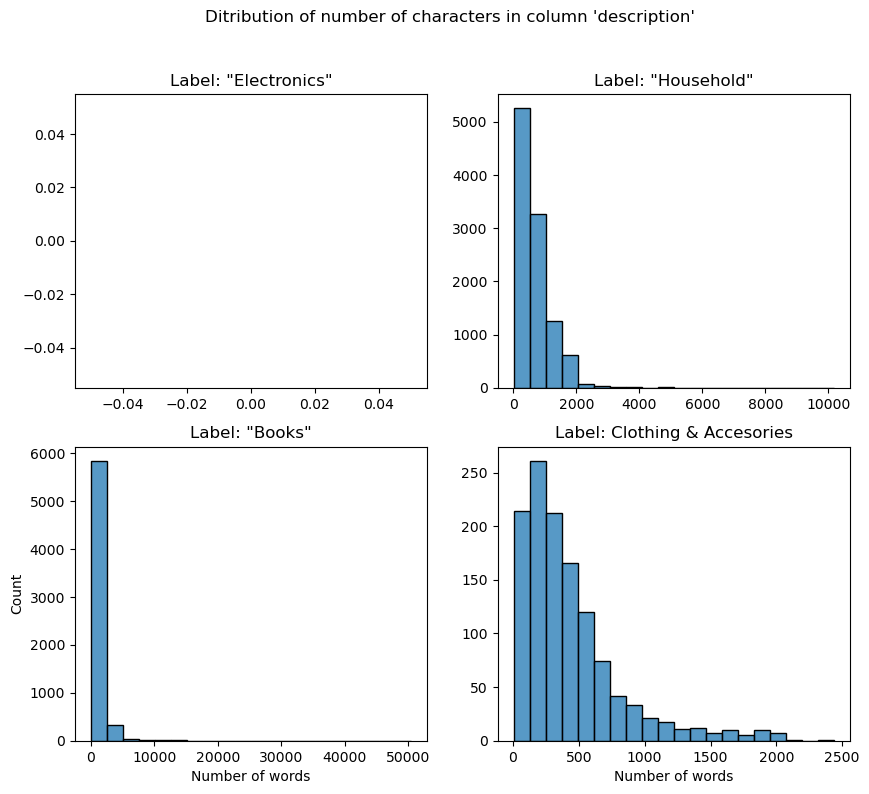

In [19]:
# Number of characters
data_electronics_char = data_electronics['Description'].str.len()
data_household_char = data_household['Description'].str.len()
data_books_char = data_books['Description'].str.len()
data_clothing_accesories_char = data_clothing_accesories['Description'].str.len()

# We visualize the amount of characters
fig, ax = plt.subplots(2,2, figsize = (10, 8.4))
sns.histplot(x = data_electronics_char, bins = 20, ax = ax[0,0]).set_title('Label: "Electronics"')
sns.histplot(x = data_household_char, bins = 20, ax = ax[0,1]).set_title('Label: "Household"')
sns.histplot(x = data_books_char, bins = 20, ax = ax[1,0]).set_title('Label: "Books"')
sns.histplot(x = data_clothing_accesories_char, bins = 20, ax = ax[1,1]).set_title('Label: Clothing & Accesories')

# We iterate to adequately name the axis of the plots
fig.suptitle("Ditribution of number of characters in column 'description'")
for i in range(4):
    ax[i//2, i%2].set_xlabel(" ") if i//2 == 0 else ax[i//2, i%2].set_xlabel("Number of words")
    if i%2 !=0: ax[i//2, i%2].set_ylabel(" ")

# usar Axes.set o setylabel()



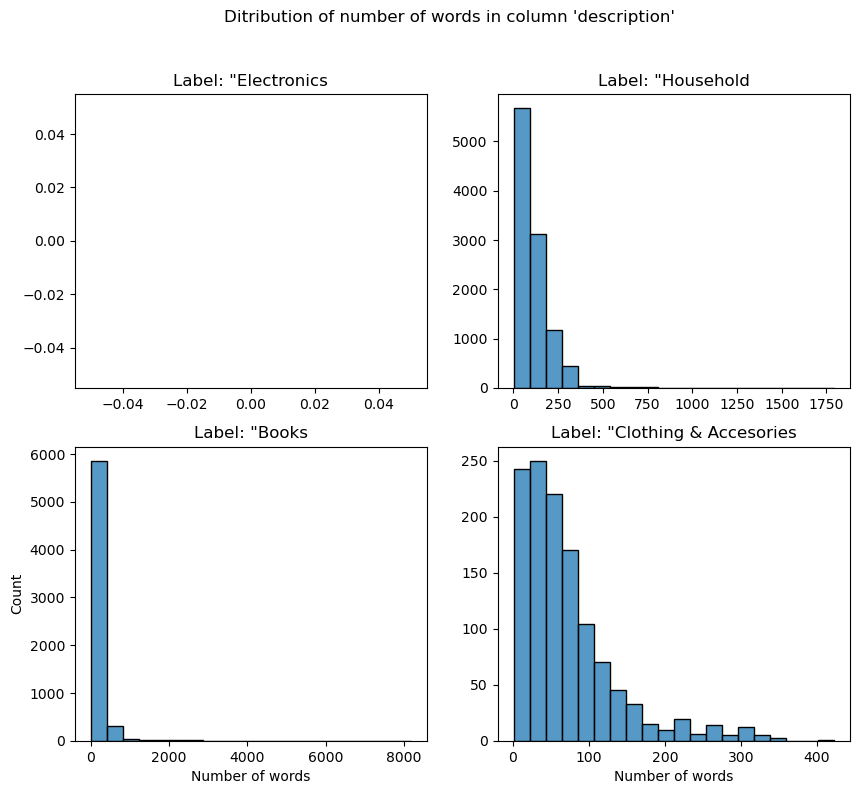

In [22]:
# Number of words
data_electronics_words = data_electronics['Description'].str.split().map(lambda x: len(x))
data_household_words = data_household['Description'].str.split().map(lambda x: len(x))
data_books_words = data_books['Description'].str.split().map(lambda x: len(x))
data_clothing_accesories_words = data_clothing_accesories['Description'].str.split().map(lambda x: len(x))

# We visualize the amount of characters
fig, ax = plt.subplots(2,2, figsize = (10, 8.4))
sns.histplot(x = data_electronics_words, bins = 20, ax = ax[0,0]).set_title('Label: "Electronics')
sns.histplot(x = data_household_words, bins = 20, ax = ax[0,1]).set_title('Label: "Household')
sns.histplot(x = data_books_words, bins = 20, ax = ax[1,0]).set_title('Label: "Books')
sns.histplot(x = data_clothing_accesories_words, bins = 20, ax = ax[1,1]).set_title('Label: "Clothing & Accesories')

# We iterate to adequately name the axis of the plots
fig.suptitle("Ditribution of number of words in column 'description'")
for i in range(4):
    ax[i//2, i%2].set_xlabel(" ") if i//2 == 0 else ax[i//2, i%2].set_xlabel("Number of words")
    if i%2 !=0: ax[i//2, i%2].set_ylabel(" ")

# usar Axes.set o setylabel()



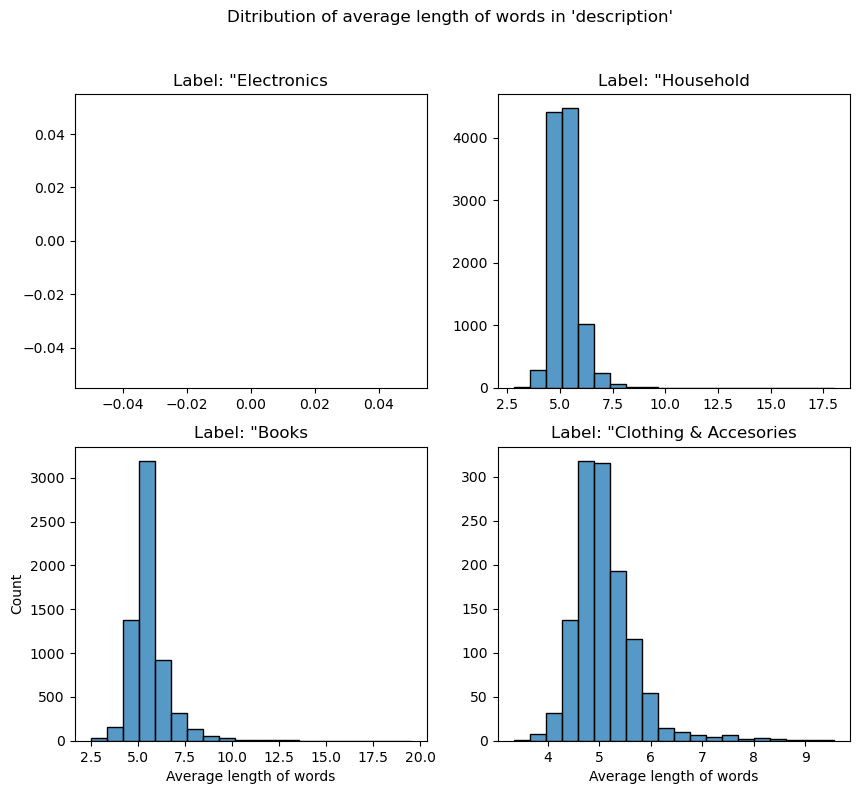

In [23]:
# Average word length
data_electronics_avg_length = data_electronics['Description'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x:np.mean(x))
data_household_avg_length = data_household['Description'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x:np.mean(x))
data_books_avg_length = data_books['Description'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x:np.mean(x))
data_clothing_accesories_avg_length = data_clothing_accesories['Description'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x:np.mean(x))

# We visualize the amount of characters
fig, ax = plt.subplots(2,2, figsize = (10, 8.4))
sns.histplot(x = data_electronics_avg_length, bins = 20, ax = ax[0,0]).set_title('Label: "Electronics')
sns.histplot(x = data_household_avg_length, bins = 20, ax = ax[0,1]).set_title('Label: "Household')
sns.histplot(x = data_books_avg_length, bins = 20, ax = ax[1,0]).set_title('Label: "Books')
sns.histplot(x = data_clothing_accesories_avg_length, bins = 20, ax = ax[1,1]).set_title('Label: "Clothing & Accesories')

# We iterate to adequately name the axis of the plots
fig.suptitle("Ditribution of average length of words in 'description'")
for i in range(4):
    ax[i//2, i%2].set_xlabel(" ") if i//2 == 0 else ax[i//2, i%2].set_xlabel("Average length of words")
    if i%2 !=0: ax[i//2, i%2].set_ylabel(" ")

# usar Axes.set o setylabel()


In [30]:
# Training and testing partitions

# x: independent variables
# y: dependent variables
x,y = df.drop('Label', axis = 1), df['Label']

# We use the 80-20 split. 80 to train, 20 to test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)
train_data = pd.concat([x_train, y_train], axis=1)

# The testing group is extracted
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=50)

data_val = pd.concat([x_val, y_val], axis = 1)
data_test = pd.concat([x_test, y_test], axis = 1)

# Comparison between training, test and validation groups
value = np.array([len(train_data), len(data_val), len(data_test)])
tags = ['Training', 'Validation', 'Test']
graph = go.Figure(data = [go.Pie(values = value,
                                 labels = tags,
                                 hole = 0.35)])

graph_title = "Percentage of data particioned for Training, Test and Validation"
graph.update_layout(height = 450, width = 650, title = graph_title)
graph.show()

In [36]:
# Tokenization
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
#%pip install num2words
from num2words import num2words
%pip install spellchecker
from spellchecker import spellchecker
from nltk.stem.porter import PorterStemmer
from nltk.stem.porter import WordNetLemmatizer

#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 10.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966498 sha256=9d0bf10c5f925f9bdd99b39810e7120d11ce03e772381b0900311746ef66a672
  Stored in directory: /Users/davidbarreto/Library/Caches/pip/wheels/2a/74/0e/f02f44db559be03fe67fd64498f758abd9082efe45d4142845
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7123 sha256=f091dd911e426a3a02624afde314d6cc3c5d8756670a218e7fbfc711e5dd8ba3
  Stored in directory: /Users/davidbarreto/Library/Caches/pip/wheels/1e/18/29/048e5ab5e2c772b87f3cda9603c59e79ca153f64e8d331c1b6
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8465 sha256=e1182e7105be8c1f140dbb997366e837bd8806d1c10445282d182b5abfd19108
  Sto

ModuleNotFoundError: No module named 'indexer'